<a href="https://colab.research.google.com/github/krishgit042023/SMS-Spam-Classifier/blob/main/SMS_Spam_Collection_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: import numpy pandas matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# prompt: load dataset

dataset = pd.read_csv('/content/spam.csv', encoding='latin-1')
# Added encoding='latin-1' to specify the file encoding

dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
dataset.shape

(5572, 5)

**Data cleaning**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# prompt: drop the last 3 columns

dataset = dataset.iloc[:, :-3]
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# prompt: name the column v1 as target and v2 as text

dataset.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
dataset.head(10)

<ipython-input-38-5e2bf5cf1056>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)


,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
# prompt: apply label encoding to target column

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dataset['target'] = encoder.fit_transform(dataset['target'])          # 0 = Ham , 1 = Spam
dataset.head(10)


<ipython-input-39-a8bcc9887774>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['target'] = encoder.fit_transform(dataset['target'])          # 0 = Ham , 1 = Spam


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [ ]:
dataset.isnull().sum()

,0
target,0
text,0


In [ ]:
# prompt: check for duplicate values

# Check for duplicates based on the 'text' column
duplicate_rows = dataset[dataset.duplicated(subset=['text'], keep=False)]

if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found based on the 'text' column.")

# Remove duplicates
dataset = dataset.drop_duplicates(subset=['text'], keep='first')
print("\nDataFrame after removing duplicates:")
dataset.shape

Duplicate rows found:
      target                                               text
2          1  Free entry in 2 a wkly comp to win FA Cup fina...
7          0  As per your request 'Melle Melle (Oru Minnamin...
8          1  WINNER!! As a valued network customer you have...
9          1  Had your mobile 11 months or more? U R entitle...
11         1  SIX chances to win CASH! From 100 to 20,000 po...
...      ...                                                ...
5524       1  You are awarded a SiPix Digital Camera! call 0...
5535       0  I know you are thinkin malaria. But relax, chi...
5539       0                         Just sleeping..and surfing
5553       0                        Hahaha..use your brain dear
5558       0                             Sorry, I'll call later

[684 rows x 2 columns]

DataFrame after removing duplicates:


(5169, 2)

In [ ]:
dataset.duplicated().sum()

0

**Exploratory Data Analysis (EDA)**

In [ ]:
# prompt: value count of target column

# Value counts of the 'target' column
print(dataset['target'].value_counts())   # 0 = Ham , 1 = Spam

target
0    4516
1     653
Name: count, dtype: int64


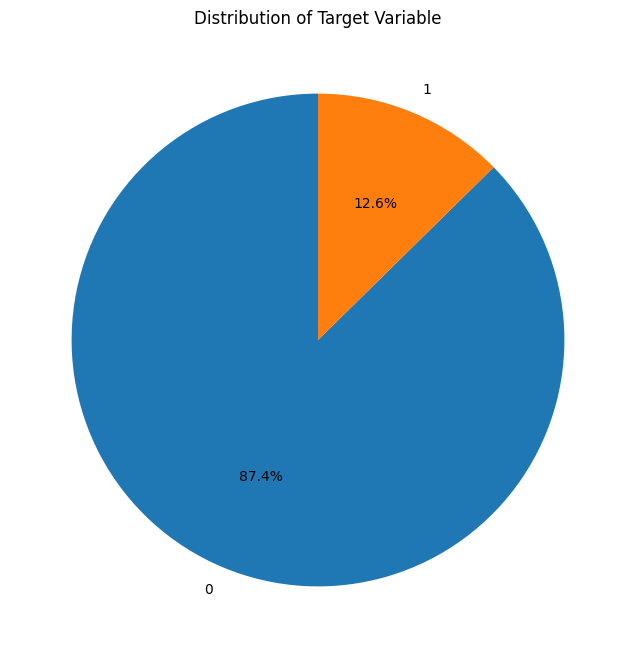

In [ ]:
# prompt: pie plot of target column

# Pie plot of the 'target' column
plt.figure(figsize=(8, 8))
dataset['target'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Target Variable')
plt.ylabel('')  # Remove the y-axis label
plt.show()

finding no. of characters in the SMS

finding no. of words in the SMS

finding no. of sentences in the SMS

In [ ]:
# prompt: find no. of characters in the sms

dataset['num_characters'] = dataset['text'].apply(len)
dataset.head()


,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# prompt: find no. of words in the sms apply nltk

!pip install nltk

import nltk
# Download the 'punkt_tab' resource
nltk.download('punkt_tab')

dataset['num_words'] = dataset['text'].apply(lambda x: len(nltk.word_tokenize(x)))
dataset.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
# prompt: find no. of sentences in the sms

dataset['num_sentences'] = dataset['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
dataset.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
dataset.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [ ]:
# prompt: give the describe output for ham from target column

dataset[dataset['target'] == 0].describe()

,target,num_characters,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [ ]:
# prompt: give the describe output for spam from target column

dataset[dataset['target'] == 1].describe()

,target,num_characters,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


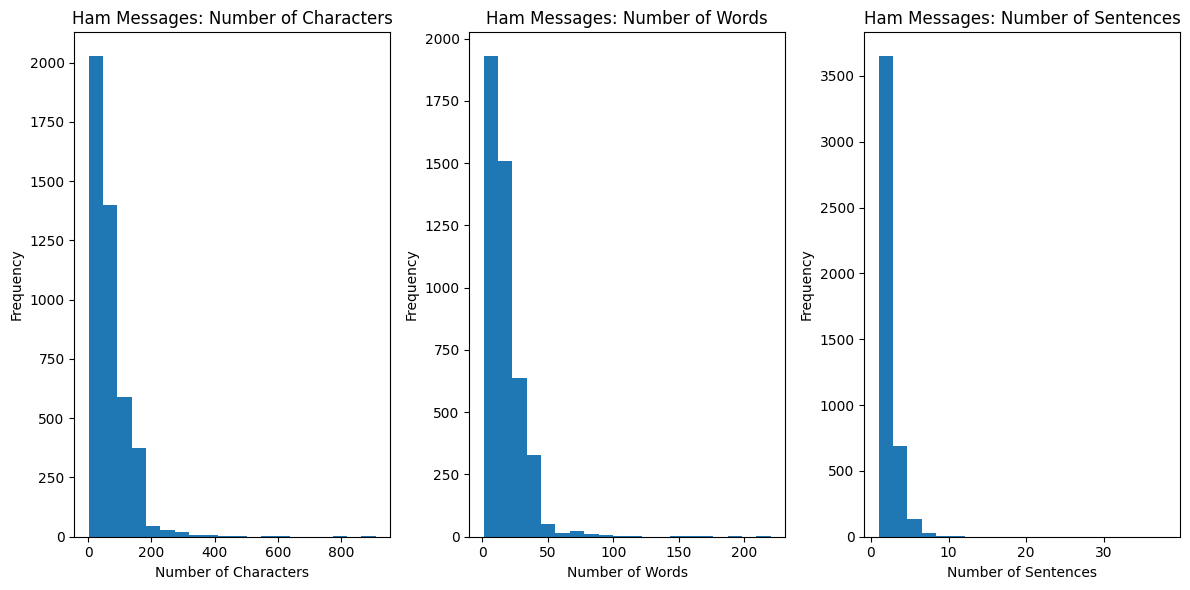

In [ ]:
# prompt: plot ham from target of num_characters	num_words	num_sentences seperately

# Plot ham messages based on num_characters, num_words, and num_sentences
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(dataset[dataset['target'] == 0]['num_characters'], bins=20)
plt.title('Ham Messages: Number of Characters')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(dataset[dataset['target'] == 0]['num_words'], bins=20)
plt.title('Ham Messages: Number of Words')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(dataset[dataset['target'] == 0]['num_sentences'], bins=20)
plt.title('Ham Messages: Number of Sentences')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

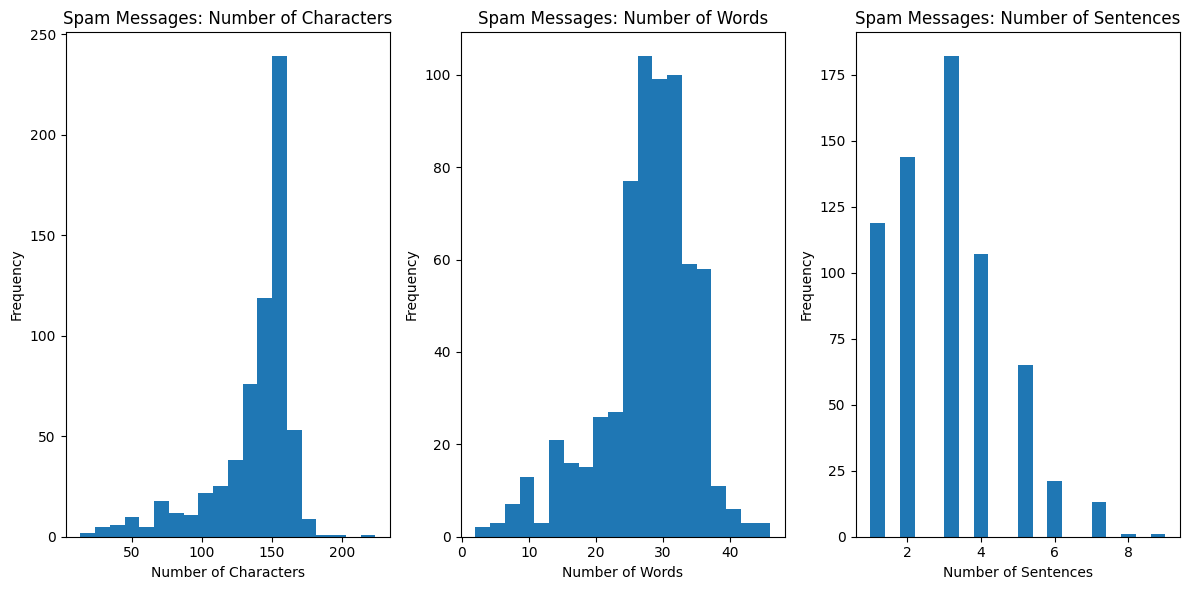

In [ ]:
# prompt: plot spam from target of num_characters	num_words	num_sentences seperately

# Plot spam messages based on num_characters, num_words, and num_sentences
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(dataset[dataset['target'] == 1]['num_characters'], bins=20)
plt.title('Spam Messages: Number of Characters')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(dataset[dataset['target'] == 1]['num_words'], bins=20)
plt.title('Spam Messages: Number of Words')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(dataset[dataset['target'] == 1]['num_sentences'], bins=20)
plt.title('Spam Messages: Number of Sentences')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

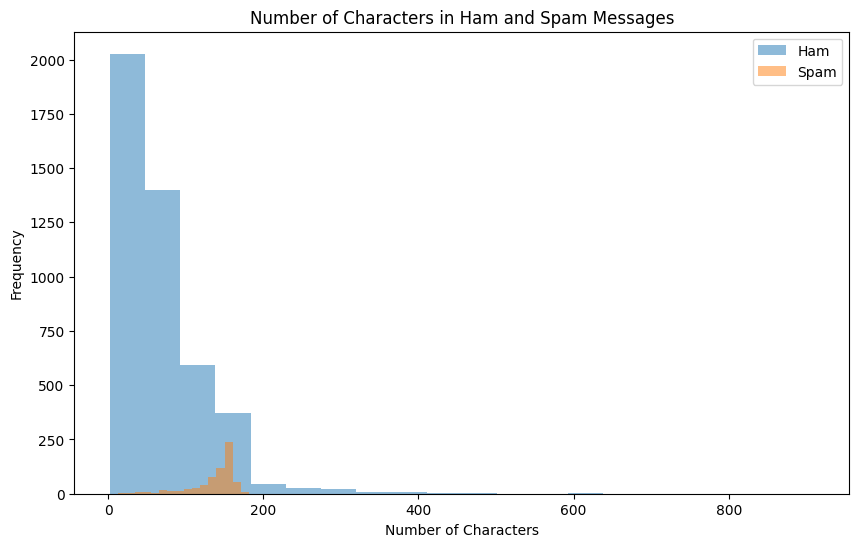

In [ ]:
# prompt: plot  num_characters	of ham and spam

plt.figure(figsize=(10, 6))
plt.hist(dataset[dataset['target'] == 0]['num_characters'], bins=20, alpha=0.5, label='Ham')
plt.hist(dataset[dataset['target'] == 1]['num_characters'], bins=20, alpha=0.5, label='Spam')
plt.title('Number of Characters in Ham and Spam Messages')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

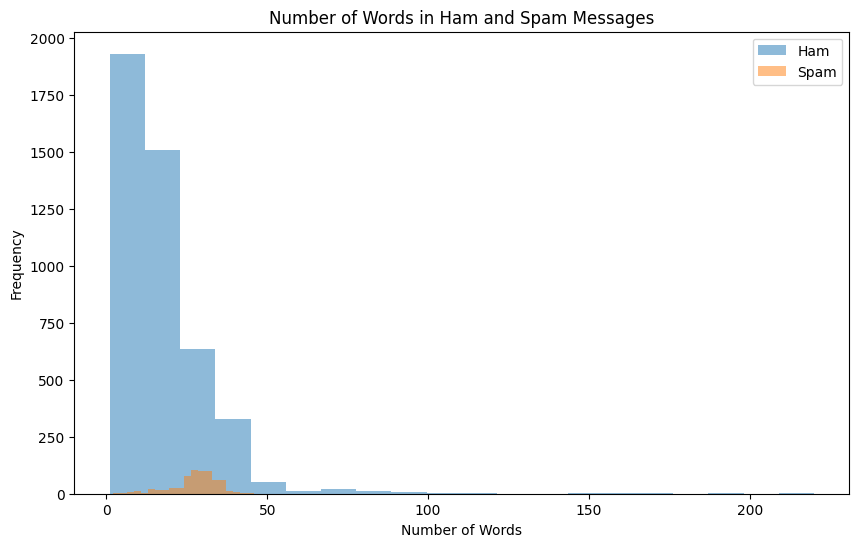

In [ ]:
# prompt: plot  num_words	of ham and spam

plt.figure(figsize=(10, 6))
plt.hist(dataset[dataset['target'] == 0]['num_words'], bins=20, alpha=0.5, label='Ham')
plt.hist(dataset[dataset['target'] == 1]['num_words'], bins=20, alpha=0.5, label='Spam')
plt.title('Number of Words in Ham and Spam Messages')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

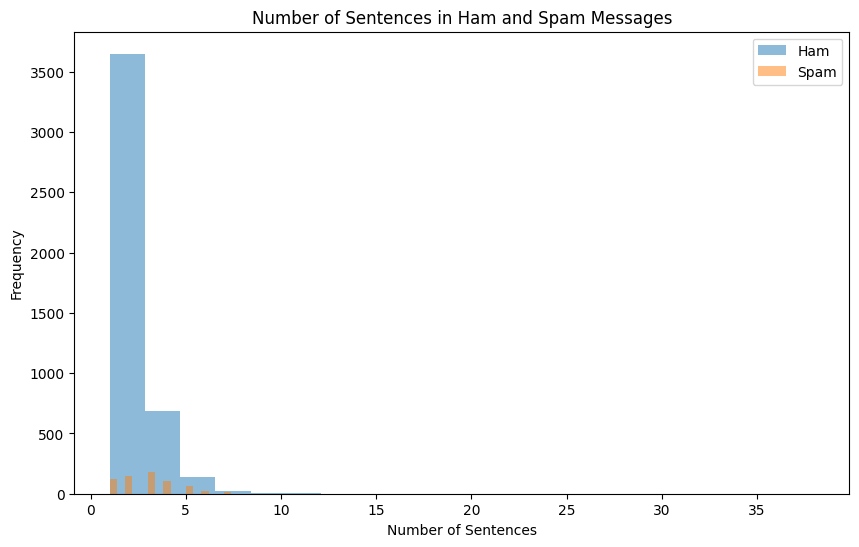

In [ ]:
# prompt: plot  num_sentences of ham and spam

plt.figure(figsize=(10, 6))
plt.hist(dataset[dataset['target'] == 0]['num_sentences'], bins=20, alpha=0.5, label='Ham')
plt.hist(dataset[dataset['target'] == 1]['num_sentences'], bins=20, alpha=0.5, label='Spam')
plt.title('Number of Sentences in Ham and Spam Messages')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

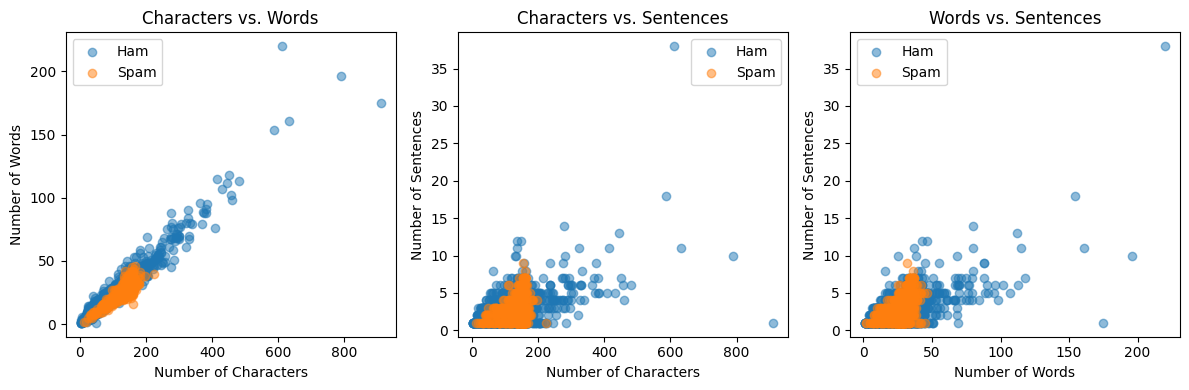

In [ ]:
# prompt: plot relation between num_characters num_words and num_sentences	of ham and spam

import matplotlib.pyplot as plt

# Assuming 'dataset' is already defined as in your provided code

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(dataset[dataset['target'] == 0]['num_characters'], dataset[dataset['target'] == 0]['num_words'], label='Ham', alpha=0.5)
plt.scatter(dataset[dataset['target'] == 1]['num_characters'], dataset[dataset['target'] == 1]['num_words'], label='Spam', alpha=0.5)
plt.xlabel("Number of Characters")
plt.ylabel("Number of Words")
plt.title("Characters vs. Words")
plt.legend()


plt.subplot(1, 3, 2)
plt.scatter(dataset[dataset['target'] == 0]['num_characters'], dataset[dataset['target'] == 0]['num_sentences'], label='Ham', alpha=0.5)
plt.scatter(dataset[dataset['target'] == 1]['num_characters'], dataset[dataset['target'] == 1]['num_sentences'], label='Spam', alpha=0.5)
plt.xlabel("Number of Characters")
plt.ylabel("Number of Sentences")
plt.title("Characters vs. Sentences")
plt.legend()


plt.subplot(1, 3, 3)
plt.scatter(dataset[dataset['target'] == 0]['num_words'], dataset[dataset['target'] == 0]['num_sentences'], label='Ham', alpha=0.5)
plt.scatter(dataset[dataset['target'] == 1]['num_words'], dataset[dataset['target'] == 1]['num_sentences'], label='Spam', alpha=0.5)
plt.xlabel("Number of Words")
plt.ylabel("Number of Sentences")
plt.title("Words vs. Sentences")
plt.legend()

plt.tight_layout()
plt.show()

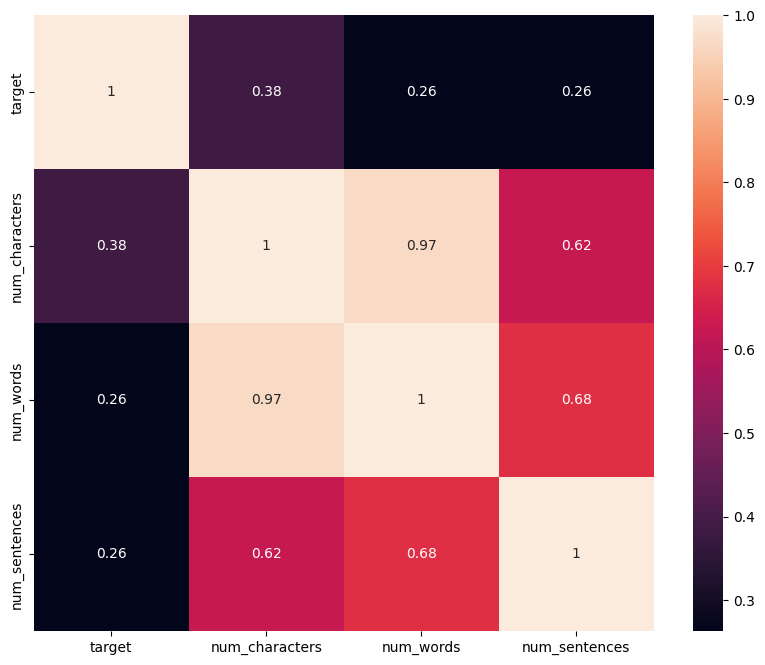

In [ ]:
# prompt: generate a heatmap


import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation calculation
numerical_dataset = dataset.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_dataset.corr(), annot=True) # Calculate correlation on numerical data
plt.show()

# **Data Preprocessing**

**lower case and tokenize**

In [ ]:
# prompt: apply lower case and tokenize to text column

import nltk
nltk.download('punkt') # Download punkt if not already present

def preprocess_text(text):
    text = text.lower() # Convert to lowercase
    tokens = nltk.word_tokenize(text) # Tokenize the text
    return tokens

dataset['processed_text'] = dataset['text'].apply(preprocess_text)
dataset.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,target,text,num_characters,num_words,num_sentences,processed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, until, jurong, point, ,, crazy, .., avail..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, ..., joking, wif, u, oni, ...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, so, early, hor, ..., u, c, alrea..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, i, do, n't, think, he, goes, to, usf, ,,..."


**removing special characters**

In [ ]:
# prompt: remove special characters from processed_text if present any

import re

def remove_special_characters(tokens):
    processed_tokens = []
    for token in tokens:
        # Remove special characters using regular expressions
        cleaned_token = re.sub(r'[^a-zA-Z0-9\s]', '', token)
        if cleaned_token:  # Check if the token is not empty after cleaning
            processed_tokens.append(cleaned_token)
    return processed_tokens

dataset['processed_text'] = dataset['processed_text'].apply(remove_special_characters)
dataset.head()

,target,text,num_characters,num_words,num_sentences,processed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, until, jurong, point, crazy, available, o..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, so, early, hor, u, c, already, t..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, i, do, nt, think, he, goes, to, usf, he,..."


**removing stopwords and punctuations**

In [ ]:
# prompt: remove stopwords and punctuations from processed_text

from nltk.corpus import stopwords
import string

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
punctuation = string.punctuation

def remove_stopwords_punctuation(tokens):
    processed_tokens = []
    for token in tokens:
        if token not in stop_words and token not in punctuation:
            processed_tokens.append(token)
    return processed_tokens

dataset['processed_text'] = dataset['processed_text'].apply(remove_stopwords_punctuation)
dataset.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,target,text,num_characters,num_words,num_sentences,processed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, nt, think, goes, usf, lives, around, tho..."


**Stemming (Applying the root word)**

In [ ]:
# prompt: apply stemming

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def stem_text(text):
    stemmed_text = [ps.stem(word) for word in text]
    return stemmed_text

dataset['processed_text'] = dataset['processed_text'].apply(stem_text)
dataset.head()

,target,text,num_characters,num_words,num_sentences,processed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, nt, think, goe, usf, live, around, though]"


**creating a word cloud**

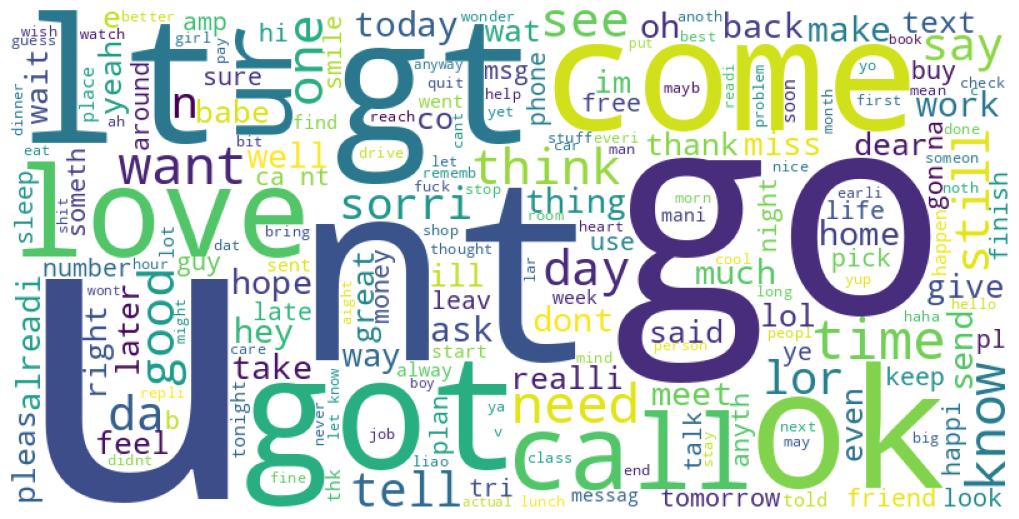

In [ ]:
# prompt: create a word cloud of ham from processed_text

!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'dataset' and 'processed_text' column are defined as in your provided code

# Combine all the processed text for ham messages
ham_words = ' '.join([' '.join(text) for text in dataset[dataset['target'] == 0]['processed_text']])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_words)

# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

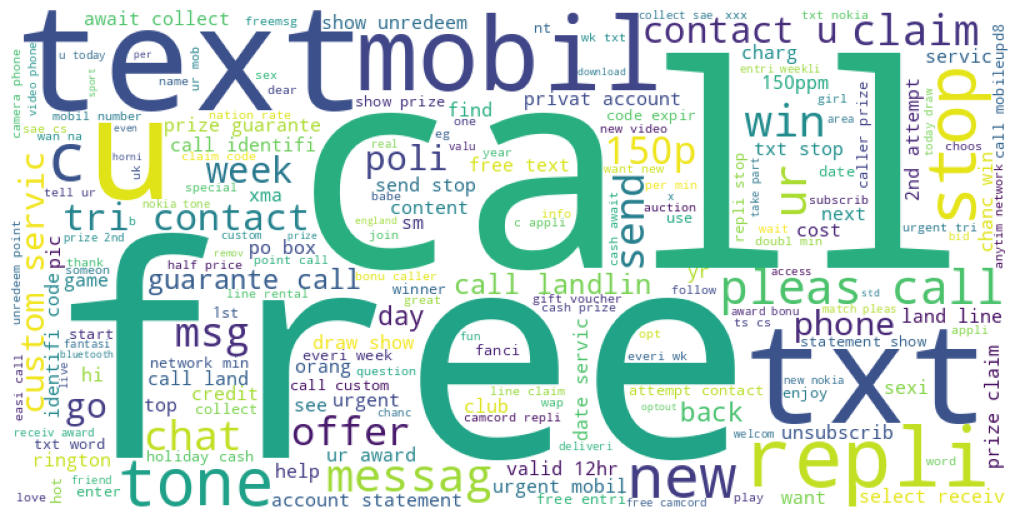

In [ ]:
# prompt: create a word cloud of spam from processed_text

# Combine all the processed text for spam messages
spam_words = ' '.join([' '.join(text) for text in dataset[dataset['target'] == 1]['processed_text']])

# Create a WordCloud object for spam
wordcloud_spam = WordCloud(width=800, height=400, background_color='white').generate(spam_words)

# Display the generated image for spam:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud_spam)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# prompt: find top 30 words from spam and ham

from collections import Counter

def get_top_n_words(corpus, n=None):
    vec = Counter()
    for text in corpus:
        for word in text:
            vec[word] += 1
    return vec.most_common(n)

# Get top 30 words for ham messages
ham_top_words = get_top_n_words(dataset[dataset['target'] == 0]['processed_text'], n=30)
print("Top 30 words in ham messages:", ham_top_words)

# Get top 30 words for spam messages
spam_top_words = get_top_n_words(dataset[dataset['target'] == 1]['processed_text'], n=30)
print("\nTop 30 words in spam messages:", spam_top_words)

Top 30 words in ham messages: [('u', 904), ('go', 404), ('nt', 352), ('get', 352), ('2', 290), ('gt', 288), ('lt', 287), ('come', 275), ('ok', 251), ('got', 238), ('know', 236), ('like', 234), ('call', 234), ('time', 219), ('love', 216), ('good', 213), ('want', 208), ('ur', 198), ('day', 195), ('need', 171), ('one', 165), ('4', 162), ('lor', 159), ('home', 152), ('think', 150), ('see', 147), ('take', 143), ('still', 143), ('da', 142), ('tell', 133)]

Top 30 words in spam messages: [('call', 321), ('free', 191), ('2', 157), ('txt', 141), ('u', 135), ('text', 122), ('ur', 119), ('mobil', 114), ('stop', 106), ('repli', 103), ('4', 100), ('claim', 98), ('prize', 82), ('get', 74), ('new', 64), ('servic', 64), ('tone', 63), ('send', 60), ('urgent', 58), ('nokia', 57), ('contact', 56), ('award', 55), ('phone', 52), ('cash', 51), ('pleas', 51), ('week', 49), ('win', 48), ('c', 46), ('collect', 45), ('min', 45)]


In [ ]:
# prompt: convert the top 30 words of spam and ham in a dataframe

# Create dataframes for top 30 words
ham_df = pd.DataFrame(ham_top_words, columns=['Word', 'Frequency'])
spam_df = pd.DataFrame(spam_top_words, columns=['Word', 'Frequency'])

print("Ham DataFrame:")
print(ham_df)

print("\nSpam DataFrame:")
spam_df

Ham DataFrame:
     Word  Frequency
0       u        904
1      go        404
2      nt        352
3     get        352
4       2        290
5      gt        288
6      lt        287
7    come        275
8      ok        251
9     got        238
10   know        236
11   like        234
12   call        234
13   time        219
14   love        216
15   good        213
16   want        208
17     ur        198
18    day        195
19   need        171
20    one        165
21      4        162
22    lor        159
23   home        152
24  think        150
25    see        147
26   take        143
27  still        143
28     da        142
29   tell        133

Spam DataFrame:


,Word,Frequency
0,call,321
1,free,191
2,2,157
3,txt,141
4,u,135
5,text,122
6,ur,119
7,mobil,114
8,stop,106
9,repli,103


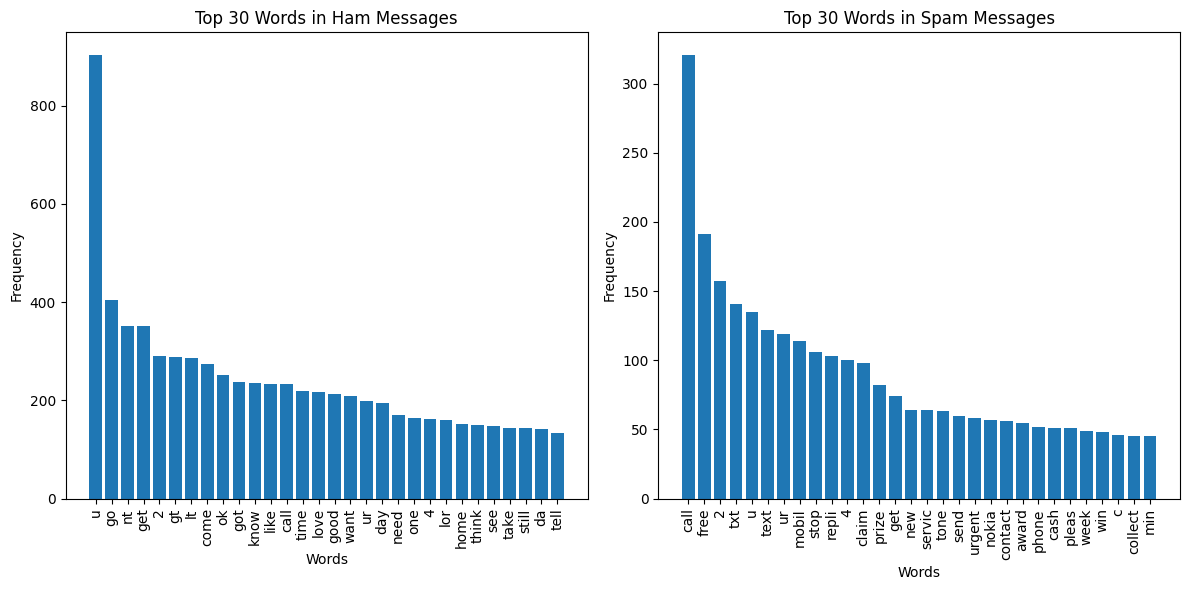

In [ ]:
# prompt: plot the top words of spam and ham

import matplotlib.pyplot as plt

# Assuming ham_df and spam_df are already created as in your provided code

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(ham_df['Word'], ham_df['Frequency'])
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Top 30 Words in Ham Messages')
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.bar(spam_df['Word'], spam_df['Frequency'])
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.title('Top 30 Words in Spam Messages')
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# prompt: find the length of spam and ham corpus

# Assuming 'dataset' is already defined as in your provided code
ham_count = len(dataset[dataset['target'] == 0])
spam_count = len(dataset[dataset['target'] == 1])

print(f"Length of Ham corpus: {ham_count}")
print(f"Length of Spam corpus: {spam_count}")

Length of Ham corpus: 4516
Length of Spam corpus: 653


# **Model Building**

**Vectorizing by Bag-of-Words**

In [ ]:
# prompt: vectorize processed_text by using bag of words

from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'dataset' and 'processed_text' column are defined as in your provided code

# Join the tokens back into strings for each processed text
dataset['processed_text'] = dataset['processed_text'].apply(lambda x: ' '.join(x))

# Create a Bag-of-Words representation using CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(dataset['processed_text']).toarray() # Convert to NumPy array

# Now X contains the vectorized representation of the processed text using Bag of Words
print(X)
X.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(5169, 7564)

In [ ]:
# prompt: split into train and test data

from sklearn.model_selection import train_test_split

# Assuming X and y are defined (X is the feature matrix and y is the target variable)
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

print(X.shape)
print(X_train.shape)
X_test.shape

(5169, 7564)
(4135, 7564)


(1034, 7564)

Accuracy: 0.9690522243713733
Precision: 0.8581081081081081
Confusion Matrix:
 [[875  21]
 [ 11 127]]


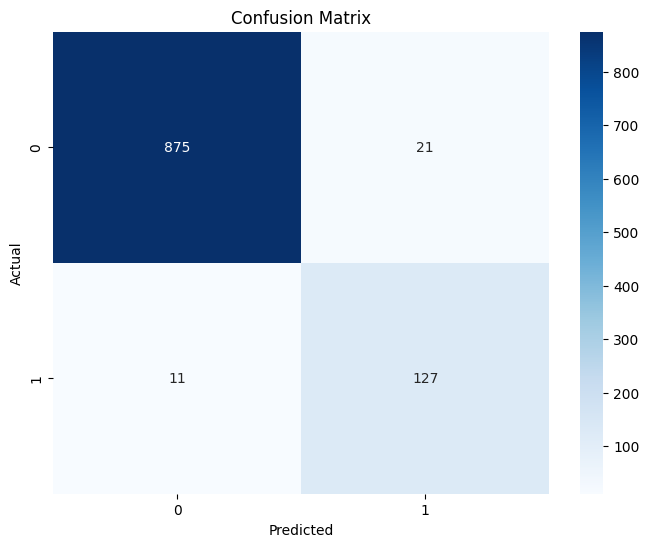

In [ ]:
# prompt: implement naive bayes

from sklearn.naive_bayes import MultinomialNB

# Initialize and train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix using seaborn (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Gaussian Naive Bayes Accuracy: 0.8868471953578336
Gaussian Naive Bayes Precision: 0.5466666666666666
Gaussian Naive Bayes Confusion Matrix:
 [[794 102]
 [ 15 123]]


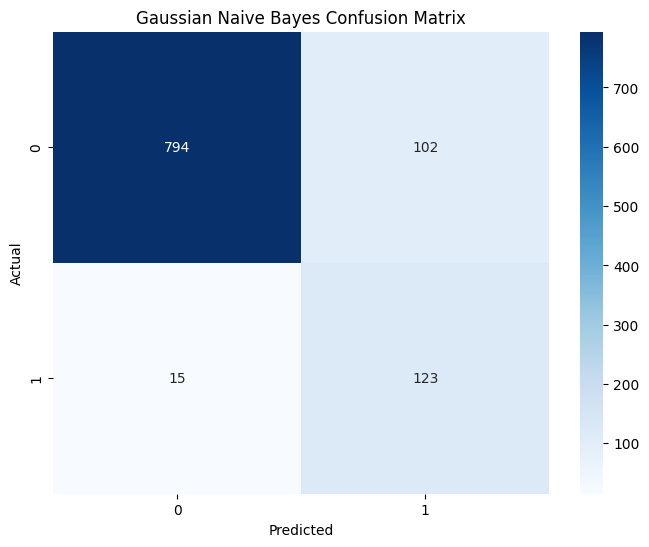

In [ ]:
# prompt: implement gaussian naive bayes

from sklearn.naive_bayes import GaussianNB

# Assuming X and y are defined (X is the feature matrix and y is the target variable)
# ... (Your existing code for data preprocessing and feature extraction) ...

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Initialize and train the Gaussian Naive Bayes model
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gnb = gnb_model.predict(X_test)

# Evaluate the model
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print("Gaussian Naive Bayes Accuracy:", accuracy_gnb)

precision_gnb = precision_score(y_test, y_pred_gnb)
print("Gaussian Naive Bayes Precision:", precision_gnb)

cm_gnb = confusion_matrix(y_test, y_pred_gnb)
print("Gaussian Naive Bayes Confusion Matrix:\n", cm_gnb)

# Visualize the confusion matrix using seaborn (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gnb, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Gaussian Naive Bayes Confusion Matrix")
plt.show()

In [ ]:
# prompt: implement bernoulli naive bayes

import numpy as np
from collections import defaultdict

class BernoulliNaiveBayes:
    def __init__(self, alpha=1.0):
        self.alpha = alpha  # Smoothing parameter
        self.classes = None
        self.class_probs = None
        self.feature_probs = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_probs = {}
        self.feature_probs = defaultdict(lambda: defaultdict(float))

        for c in self.classes:
            class_mask = (y == c)
            self.class_probs[c] = np.sum(class_mask) / len(y)

            # Calculate probabilities for each feature given the class
            for j in range(X.shape[1]):
                self.feature_probs[c][j] = (np.sum(X[class_mask, j]) + self.alpha) / (np.sum(class_mask) + 2*self.alpha)

    def predict(self, X):
      predictions = []
      for x in X:
          posteriors = {}
          for c in self.classes:
              posterior = np.log(self.class_probs[c])
              for j in range(len(x)):
                  if x[j] == 1:
                      posterior += np.log(self.feature_probs[c][j])
                  else:
                      posterior += np.log(1 - self.feature_probs[c][j])
              posteriors[c] = posterior
          predictions.append(max(posteriors, key=posteriors.get))
      return np.array(predictions)

Bernoulli Naive Bayes Accuracy: 0.9671179883945842
Bernoulli Naive Bayes Precision: 0.9905660377358491
Bernoulli Naive Bayes Confusion Matrix:
 [[895   1]
 [ 33 105]]


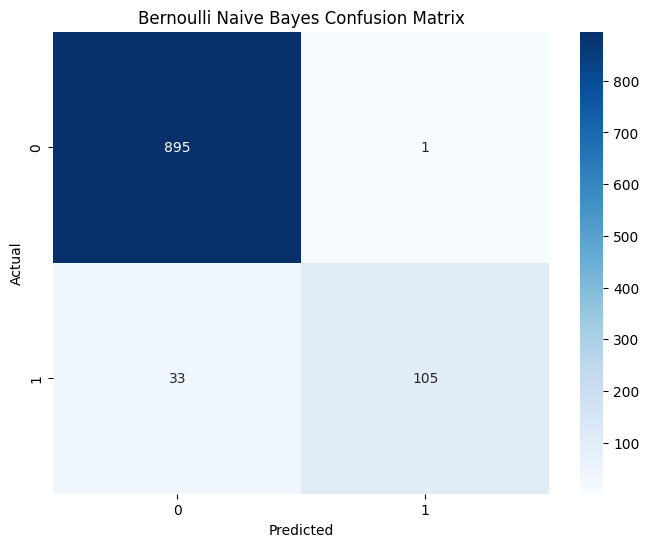

In [ ]:
# prompt: give prediction accuracy on bernoulli naive bayes

# Initialize and train the Bernoulli Naive Bayes model
bnb_model = BernoulliNaiveBayes(alpha=1.0)  # You can adjust the alpha parameter
bnb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_bnb = bnb_model.predict(X_test)

# Evaluate the model
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)
print("Bernoulli Naive Bayes Accuracy:", accuracy_bnb)

precision_bnb = precision_score(y_test, y_pred_bnb)
print("Bernoulli Naive Bayes Precision:", precision_bnb)

cm_bnb = confusion_matrix(y_test, y_pred_bnb)
print("Bernoulli Naive Bayes Confusion Matrix:\n", cm_bnb)

# Visualize the confusion matrix using seaborn (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bnb, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Bernoulli Naive Bayes Confusion Matrix")
plt.show()

**Vectorizing by TF-IDF**

In [ ]:
# prompt: vectorize processed_text by tf-idf

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(dataset['processed_text']).toarray()

In [ ]:
# prompt: split into train and test data

# Assuming X and y are defined (X is the feature matrix and y is the target variable)
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

print(X.shape)
print(X_train.shape)
X_test.shape

(5169, 7564)
(4135, 7564)


(1034, 7564)

Gaussian Naive Bayes Accuracy: 0.8810444874274661
Gaussian Naive Bayes Precision: 0.5345622119815668
Gaussian Naive Bayes Confusion Matrix:
 [[795 101]
 [ 22 116]]


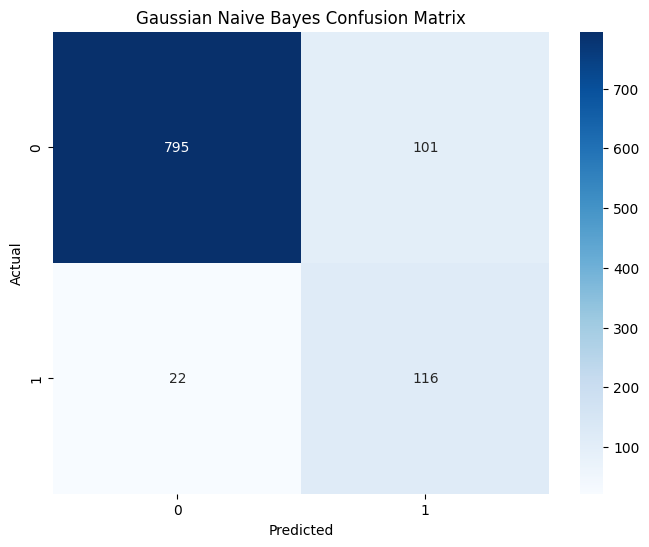

In [ ]:
# prompt: apply gaussian naive bayes

# Assuming X and y are defined (X is the feature matrix and y is the target variable)
# ... (Your existing code for data preprocessing and feature extraction) ...

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Initialize and train the Gaussian Naive Bayes model
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gnb = gnb_model.predict(X_test)

# Evaluate the model
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print("Gaussian Naive Bayes Accuracy:", accuracy_gnb)

precision_gnb = precision_score(y_test, y_pred_gnb)
print("Gaussian Naive Bayes Precision:", precision_gnb)

cm_gnb = confusion_matrix(y_test, y_pred_gnb)
print("Gaussian Naive Bayes Confusion Matrix:\n", cm_gnb)

# Visualize the confusion matrix using seaborn (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gnb, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Gaussian Naive Bayes Confusion Matrix")
plt.show()

Accuracy: 0.9584139264990329
Precision: 1.0
Confusion Matrix:
 [[896   0]
 [ 43  95]]


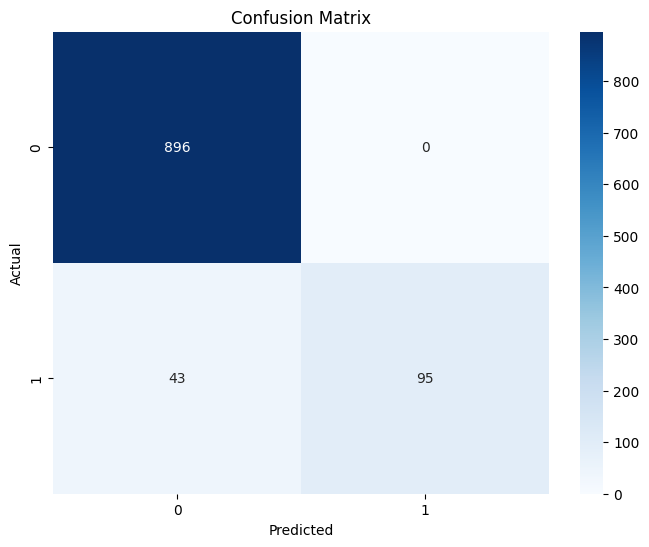

In [ ]:
# prompt: apply MultinomialNB

# Assuming X and y are defined (X is the feature matrix and y is the target variable)
# ... (Your existing code for data preprocessing and feature extraction) ...

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Initialize and train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix using seaborn (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Bernoulli Naive Bayes Accuracy: 0.9738878143133463
Bernoulli Naive Bayes Precision: 0.9743589743589743
Bernoulli Naive Bayes Confusion Matrix:
 [[893   3]
 [ 24 114]]


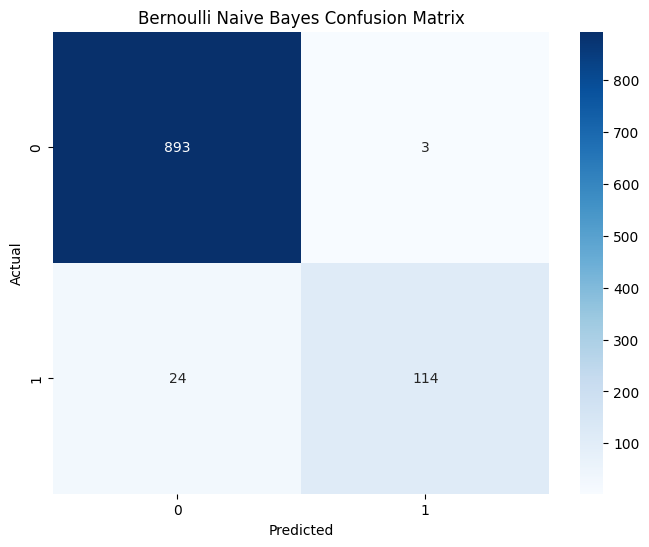

In [ ]:
# prompt: apply BernoulliNB

# Assuming X and y are defined (X is the feature matrix and y is the target variable)
# ... (Your existing code for data preprocessing and feature extraction) ...

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

from sklearn.naive_bayes import BernoulliNB

# Initialize and train the Bernoulli Naive Bayes model
bnb_model = BernoulliNB()  # You can adjust the alpha parameter
bnb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_bnb = bnb_model.predict(X_test)

# Evaluate the model
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)
print("Bernoulli Naive Bayes Accuracy:", accuracy_bnb)

precision_bnb = precision_score(y_test, y_pred_bnb)
print("Bernoulli Naive Bayes Precision:", precision_bnb)

cm_bnb = confusion_matrix(y_test, y_pred_bnb)
print("Bernoulli Naive Bayes Confusion Matrix:\n", cm_bnb)

# Visualize the confusion matrix using seaborn (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bnb, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Bernoulli Naive Bayes Confusion Matrix")
plt.show()

**Keeping TF-IDF with MultinomialNB**

# **Model Improvement**

In [ ]:
# prompt: vectorize tf-idf with different max_features

max_features_options = [1000, 5000, 10000] #@param {type:"raw"}

for max_features in max_features_options:
  tfidf = TfidfVectorizer(max_features=max_features)
  X = tfidf.fit_transform(dataset['processed_text']).toarray()
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
  model = MultinomialNB()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy with max_features={max_features}: {accuracy}")

Accuracy with max_features=1000: 0.9787234042553191
Accuracy with max_features=5000: 0.9680851063829787
Accuracy with max_features=10000: 0.9584139264990329


In [ ]:
# prompt: check precision with best max features

max_features_options = [1000, 5000, 10000] #@param {type:"raw"}

for max_features in max_features_options:
  tfidf = TfidfVectorizer(max_features=max_features)
  X = tfidf.fit_transform(dataset['processed_text']).toarray()
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
  model = MultinomialNB()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  print(f"Accuracy with max_features={max_features}: {accuracy}")
  print(f"Precision with max_features={max_features}: {precision}")

Accuracy with max_features=1000: 0.9787234042553191
Precision with max_features=1000: 1.0
Accuracy with max_features=5000: 0.9680851063829787
Precision with max_features=5000: 1.0
Accuracy with max_features=10000: 0.9584139264990329
Precision with max_features=10000: 1.0


Voting Classifier Accuracy: 0.9709864603481625
Voting Classifier Precision: 1.0
Voting Classifier Confusion Matrix:
 [[896   0]
 [ 30 108]]


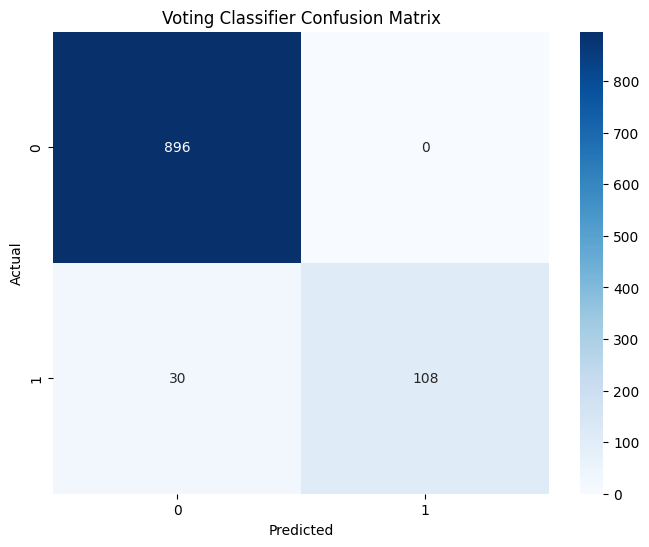

In [ ]:
# prompt: apply voting classifier

from sklearn.ensemble import VotingClassifier

# Assuming X and y are defined and preprocessed as in the original code
# ... (Your existing code for data preprocessing and feature extraction) ...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


# Define the individual classifiers
clf1 = MultinomialNB()
clf2 = GaussianNB()
clf3 = BernoulliNB()

# Create the voting classifier
voting_clf = VotingClassifier(estimators=[('mnb', clf1), ('gnb', clf2), ('bnb', clf3)], voting='hard')

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Make predictions
y_pred_voting = voting_clf.predict(X_test)


# Evaluate the model
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print("Voting Classifier Accuracy:", accuracy_voting)

precision_voting = precision_score(y_test, y_pred_voting)
print("Voting Classifier Precision:", precision_voting)

cm_voting = confusion_matrix(y_test, y_pred_voting)
print("Voting Classifier Confusion Matrix:\n", cm_voting)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_voting, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Voting Classifier Confusion Matrix")
plt.show()

Stacking Classifier Accuracy: 0.9700193423597679
Stacking Classifier Precision: 0.9819819819819819
Stacking Classifier Confusion Matrix:
 [[894   2]
 [ 29 109]]


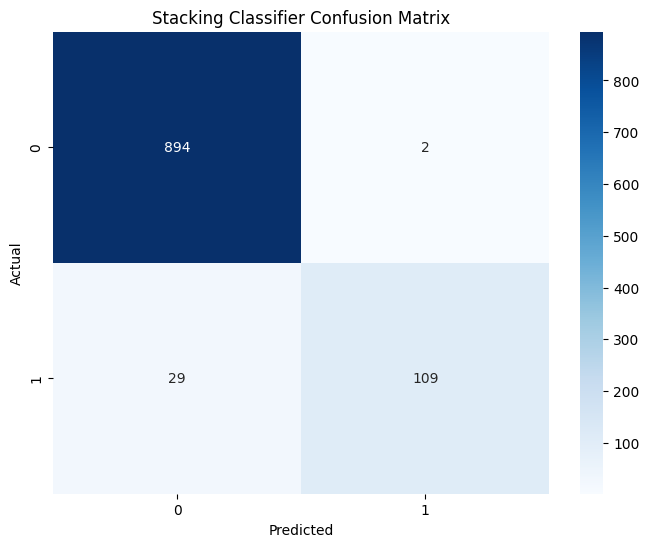

In [ ]:
# prompt: apply stacking

# Assuming X and y are defined and preprocessed as in the original code
# ... (Your existing code for data preprocessing and feature extraction) ...

from sklearn.ensemble import StackingClassifier

# Define the base estimators
estimators = [
    ('mnb', MultinomialNB()),
    ('gnb', GaussianNB()),
    ('bnb', BernoulliNB())
]

# Define the final estimator (meta-learner)
final_estimator = MultinomialNB()

# Create the stacking classifier
stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator
)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Train the stacking classifier
stacking_classifier.fit(X_train, y_train)

# Make predictions
y_pred_stacking = stacking_classifier.predict(X_test)

# Evaluate the model
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print("Stacking Classifier Accuracy:", accuracy_stacking)

precision_stacking = precision_score(y_test, y_pred_stacking)
print("Stacking Classifier Precision:", precision_stacking)

cm_stacking = confusion_matrix(y_test, y_pred_stacking)
print("Stacking Classifier Confusion Matrix:\n", cm_stacking)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_stacking, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Stacking Classifier Confusion Matrix")
plt.show()

In [ ]:
# prompt: create a pickle file tfidf and multinomialnb

import pickle

# Assuming 'tfidf' and 'model' are defined as in your provided code
# ... (Your existing code for data preprocessing and model training) ...

# Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

# Save the trained MultinomialNB model
with open('multinomialnb_model.pkl', 'wb') as f:
    pickle.dump(model, f)